# Step 1: Import Necessary Liberaries

In [88]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px

# SimpleImputer for imputiong missing values
from sklearn.impute import SimpleImputer

# Iterative Imputer for imputing missing values using ML models
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Evaluation metrics for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset

In [89]:
df_train = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/train.csv')
df_test = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/test.csv')
submission = pd.read_csv(r'C:\Users\Admin\Desktop\PYTHON-For-Data-Science_and_AI\00_projects\04_titanic_eda_and_model_for_prediction\data/gender_submission.csv')

# Step 3: Basic Information about the Dataset

In [90]:
# Let's see any 5 values of the dataset
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S


In [91]:
print(f"The shape of training dataset is {df_train.shape} in which we have {df_train.shape[0]} rows and {df_train.shape[1]} columns.") 

print('---------------------------------------------------------------------------------------')

print(f"The shape of training dataset is {df_test.shape} in which we have {df_test.shape[0]} rows and {df_test.shape[1]} columns.") 

The shape of training dataset is (891, 12) in which we have 891 rows and 12 columns.
---------------------------------------------------------------------------------------
The shape of training dataset is (418, 11) in which we have 418 rows and 11 columns.


## 3.1 Training Dataste

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **5 Columns of int64 dtype**
          1.  PassengerID
          2.  Survived
          3.  Pclass
          4.  Sibsp
          5.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Embarked` Columns.


## 3.2 Testing Dataset

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### 3.2.1 Observations
1. Here we can see the `column` names and their `data types` which are following:
    1. **7 Numerical Columns**
       - **4 Columns of int64 dtype**
          1.  PassengerID
          2.  Pclass
          3.  Sibsp
          4.  Parch
       - **2 Columns of float64 dtype**
          1. Age
          2. Fare
    2. **5 Categorical Columns**
       1. Name
       2. Sex
       3. Ticket
       4. Cabin
       5. Embarked
2. We can see the `missing values` in `Age, Cabin and Fare` Columns.


# Step 4: Basis Statistical Summmary

In [123]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,876.0,444.794521,257.806393,1.0000,220.750,444.5,667.250,891.0000
Survived,876.0,0.389269,0.487863,0.0000,0.000,0.0,1.000,1.0000
Pclass,876.0,2.315068,0.835663,1.0000,2.000,3.0,3.000,3.0000
Age,876.0,23.829532,17.682667,-0.5000,7.750,24.0,35.000,80.0000
SibSp,876.0,0.531963,1.110009,0.0000,0.000,0.0,1.000,8.0000
Parch,876.0,0.388128,0.811374,0.0000,0.000,0.0,0.000,6.0000
Fare,876.0,32.755650,49.936826,4.0125,7.925,14.5,31.275,512.3292


# Step 5: Exploratory Data Analysis (EDA)

In [94]:
df_train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.50,C52,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.50,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.00,1,1,237789,30.00,NaN,S
749,750,0,3,"Connaghton, Mr. Michael",male,31.00,0,0,335097,7.75,NaN,Q


## 5.1 `Survived Column`

In [95]:
# Let's see the value counts of survived
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

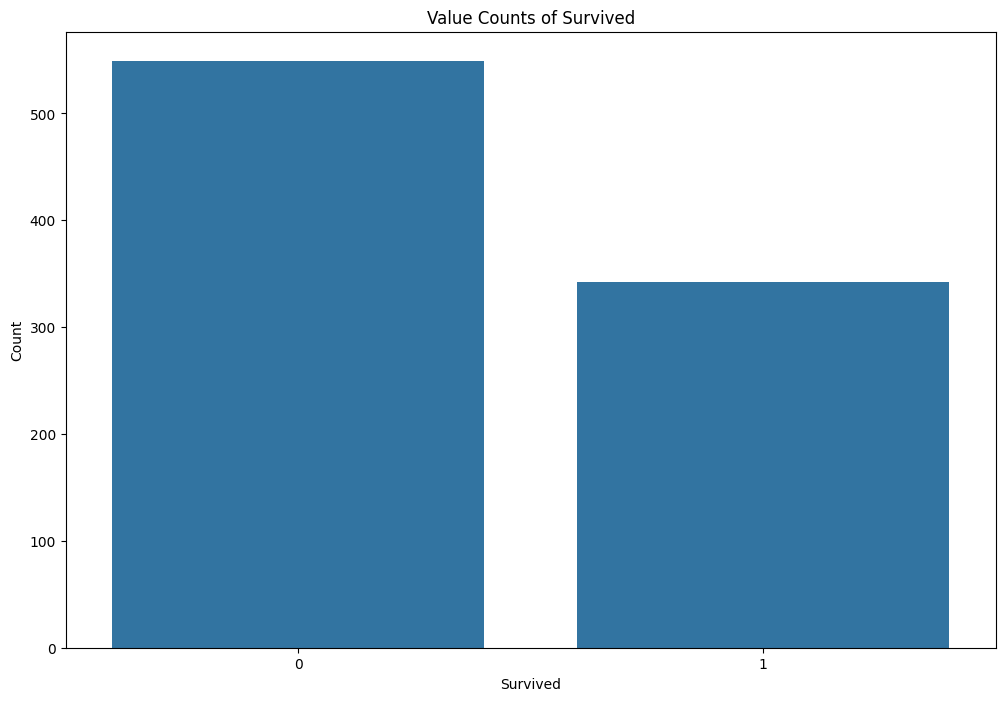

In [96]:
# Let's plot the value counts of the 'Survived' column
plt.figure(figsize=(12, 8))

sns.barplot(x = df_train['Survived'].value_counts().index, y = df_train['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [97]:
# Let's find out the survival rate upto 2 decimal points
not_survived = 549
survived = 342
total = 891

survival_rate = round((not_survived - survived) / not_survived * 100, 2)
print(f"{survival_rate}%")

37.7%


### 5.1.1 Observations
- From the above graph we can see that most of the people `not survived in titanic accident`.
- The `survival rate was 37.7%` in titanic accident.

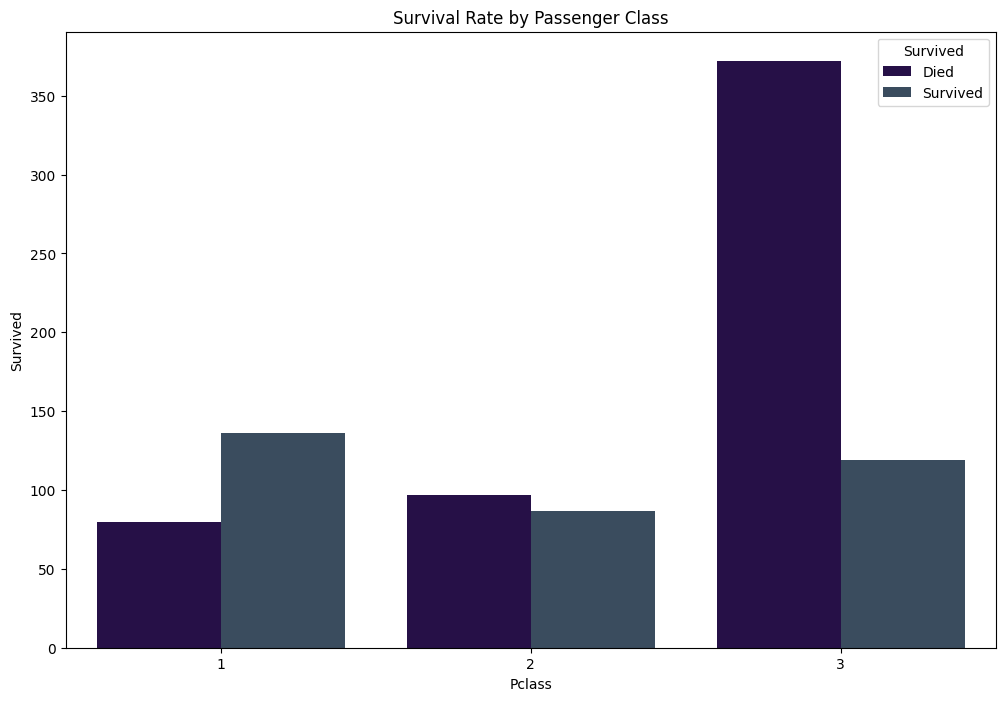

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


In [98]:
# Let's plot the value counts of the 'Survived' column based on Pclass
plt.figure(figsize=(12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(data = df_train, x = 'Pclass', hue = 'Survived', palette = color)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend(title='Survived', labels = ['Died', 'Survived'])
plt.show()

# Print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

### 5.1.2 Observations
- `Most` of the people who survived was in `1st Pclass` and most of the people who `not survived was in 3rd Pclass`.

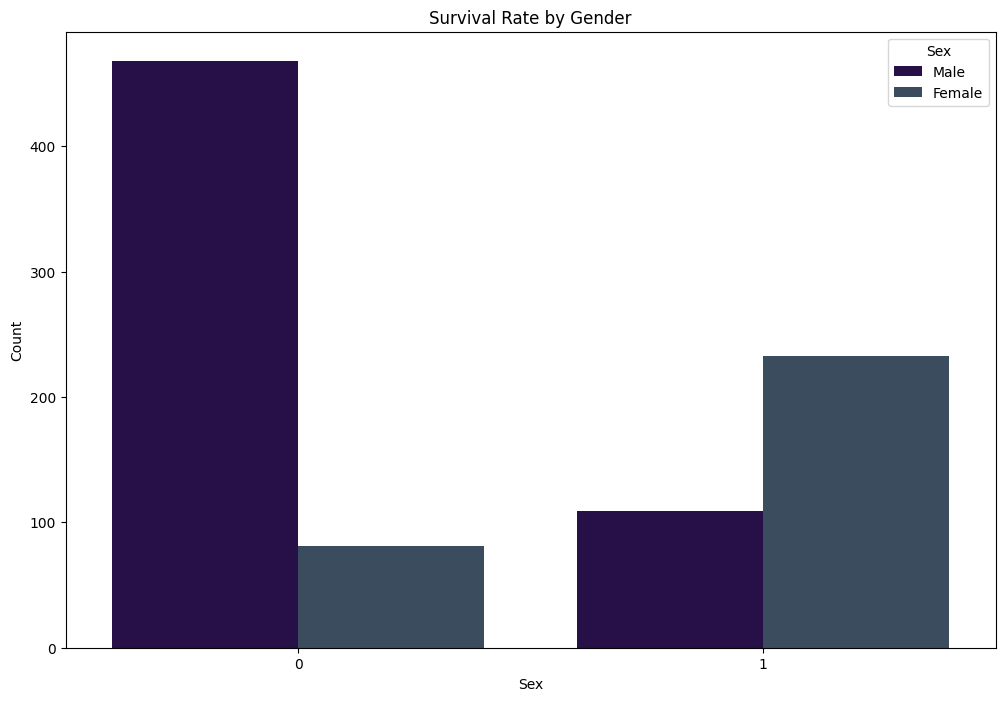

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


In [99]:
# Let's plot Survived based on Sex column
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(x='Survived', hue='Sex', data=df_train, palette=color)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

# Print percentages of females vs. males that survive
print("Percentage of females who survived:", df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### 5.1.3 Observations
- As We can see from the above graph, `females` have a much `higher` chance of `survival` than males.

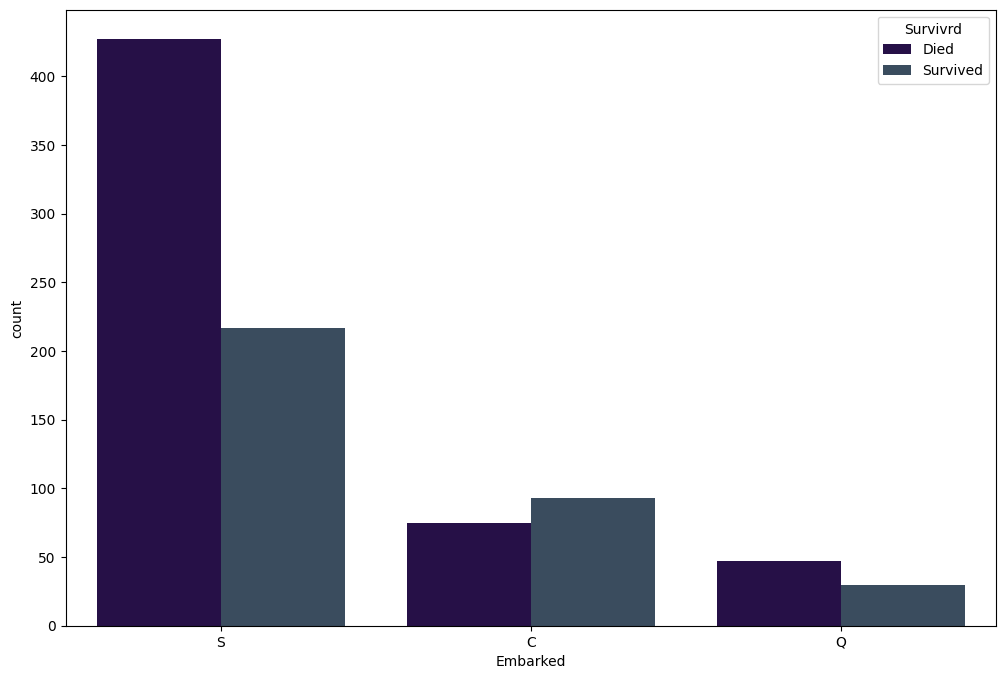

In [100]:
# Let's see survived based on embaarked
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(df_train, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Survivrd', labels = ['Died', 'Survived'])
plt.show()

### 5.1.4 Observations
- `Most` of the people belonged to `Southampton` and among those `max people not survived`.

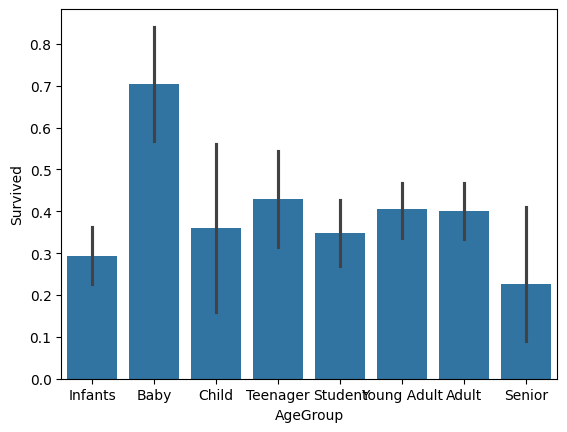

In [101]:
# Sort the ages into logical categories
df_train["Age"] = df_train["Age"].fillna(-0.5)
df_test["Age"] = df_train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infants', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
df_test['AgeGroup'] = pd.cut(df_test["Age"], bins, labels = labels)

# Draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df_train)
plt.show()

### 5.1.5 Observations
- `Babies` are more likely to `survive`.
- `Senior passengers` have `least` survival rate .

## 5.2 `Pclass Column`

In [102]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

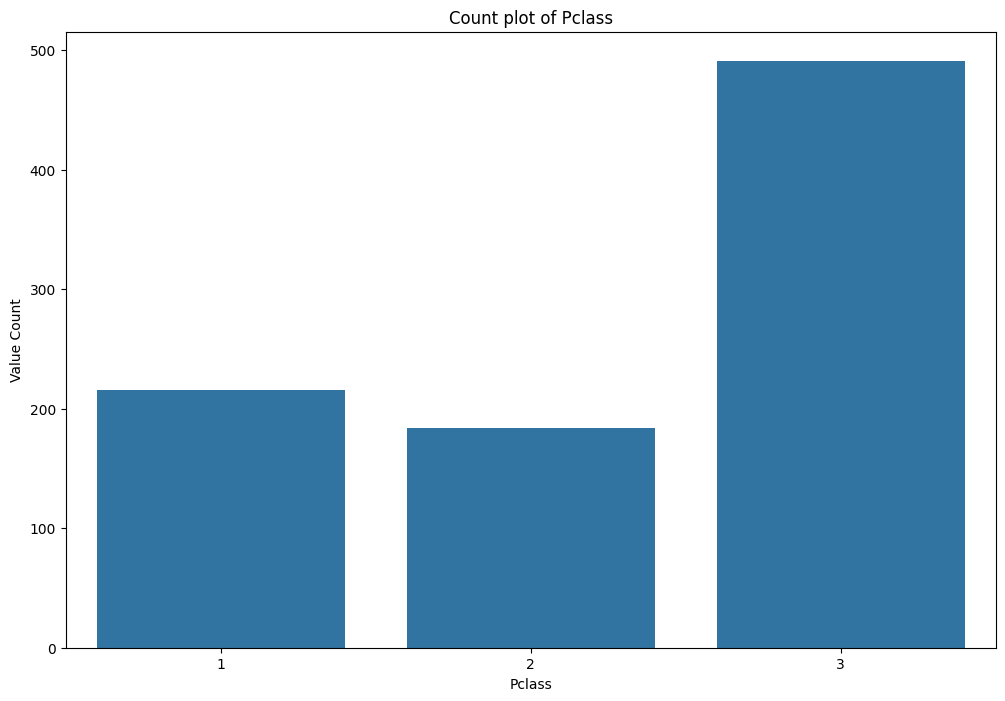

In [103]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Pclass')
plt.title('Count plot of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Value Count')
plt.show()

### 5.2.1 Observations
- `Most` of the people were travelling in `3rd class` of titanic.

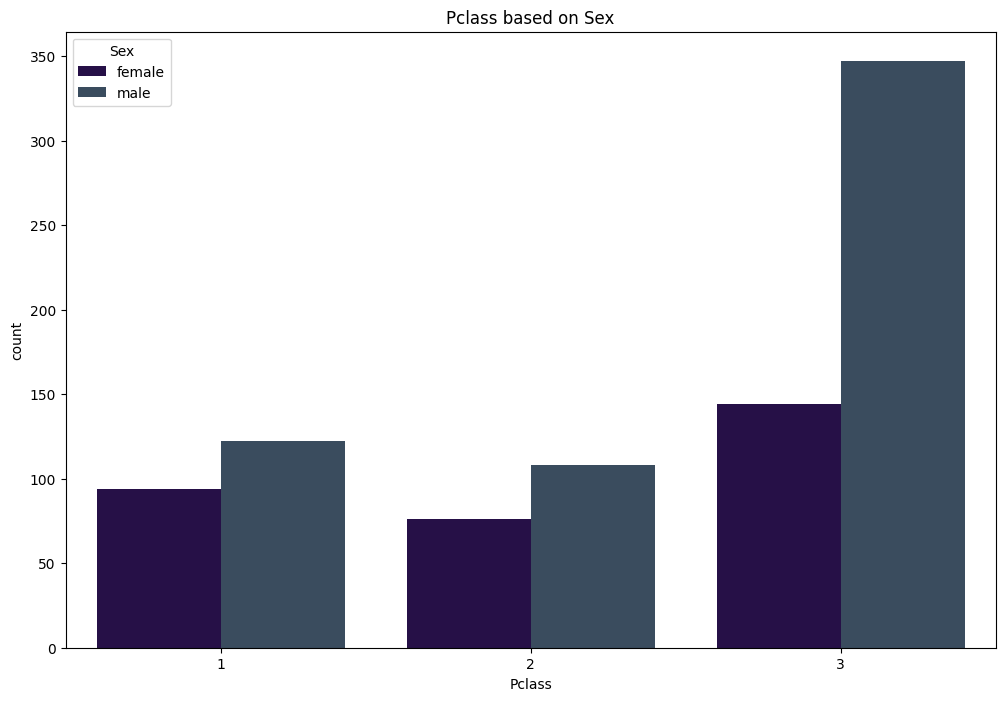

In [104]:
# Let's plot Pclass based on Sex
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64']

sns.countplot(df_train, x = 'Pclass', hue = 'Sex', palette=color)
plt.title('Pclass based on Sex')
plt.show()

### 5.2.2 Observations
- `Most` of the Male and Female both were travelling in `3rd class`.

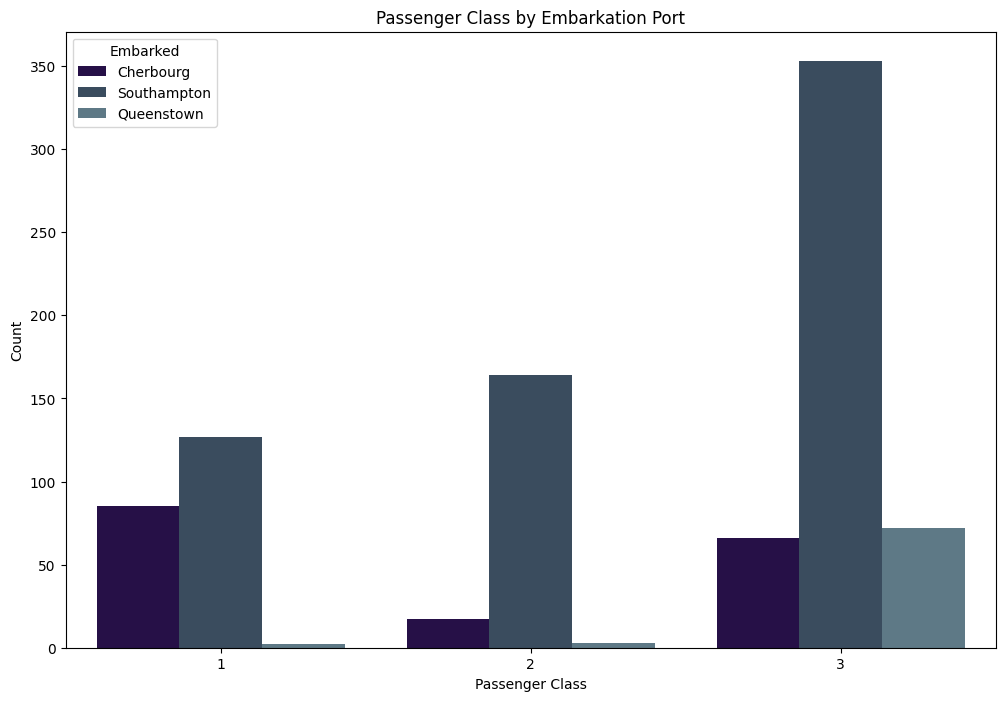

In [105]:
# Let's see the Pclass based on Embarked
plt.figure(figsize = (12, 8))

# Let's define color for each class
color = ['#240750', '#344C64', '#577B8D']

sns.countplot(x='Pclass', hue='Embarked', data=df_train, palette=color)
plt.title('Passenger Class by Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title = 'Embarked', labels = ['Cherbourg', 'Southampton', 'Queenstown'])
plt.show()

### 5.2.3 Observations
- We can see that most of the people in `3rd class` were from `Cherbourg`.

## 5.3 `Sex Column`

In [106]:
# Let's check the value counts of Sex
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

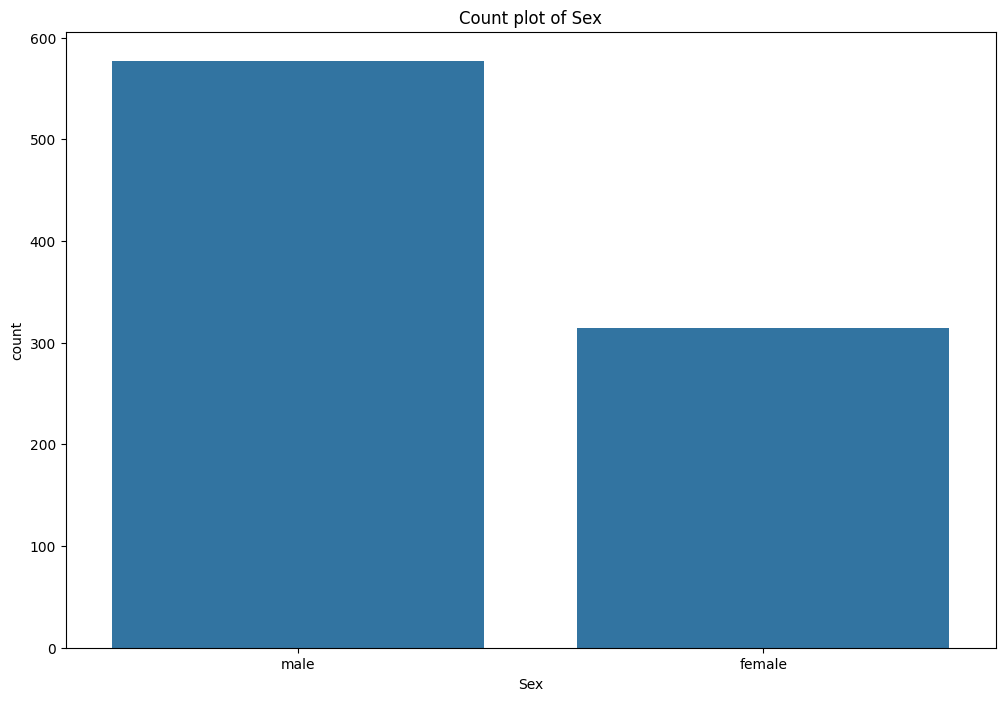

In [107]:
# Let's plot this
plt.figure(figsize = (12, 8))

sns.countplot(df_train, x = 'Sex')
plt.title('Count plot of Sex')
plt.show()

### 5.3.1 Observation
- `Male` were `larger` in number in titanic.

In [108]:
# Let's check the percentage of male and females upto 2 decimal points
per_male = (891 - 577) / 891 * 100
per_female = (891 - 314) / 891 * 100

print(f"The percentage of males is {round(per_male, 2)}% and female is {round(per_female, 2)}% in the dataset.")

The percentage of males is 35.24% and female is 64.76% in the dataset.


In [109]:
# Let's check how many percent males are higher than females
diff = (577 - 314) / 314 * 100
print(f"Males are {round(diff, 2)}% higher than females.")

Males are 83.76% higher than females.


## 5.4 `Age Column`

In [110]:
# Let's check the maximum and minimum age
df_train['Age'].max(), df_train['Age'].min()

(80.0, -0.5)

### 5.4.1 Observations
- The `maximum age` is `80` years.
- The `minimum` age is `0.42` years.

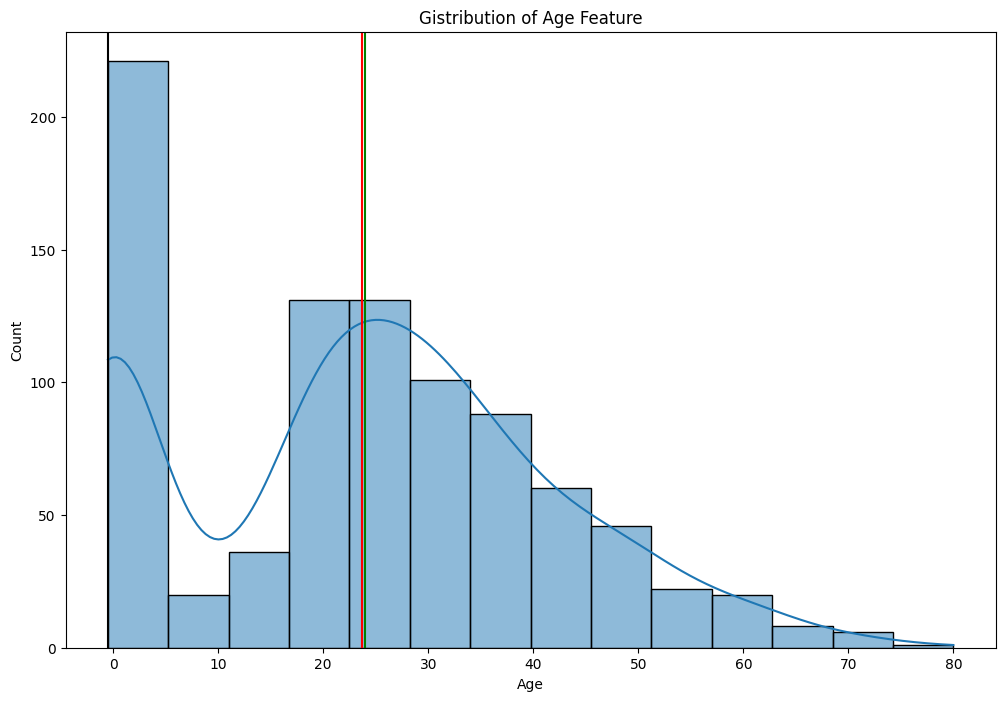

The mean of Age is: 23.69996632996633
The median of Age is: 24.0
The mode of Age is: -0.5


In [111]:
# Let's check the distribution of Age and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Age', kde = True)
plt.title('Gistribution of Age Feature')
plt.axvline(df_train['Age'].mean(), color = 'red')
plt.axvline(df_train['Age'].median(), color = 'green')
plt.axvline(df_train['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Age is: {df_train['Age'].mean()}")
print(f"The median of Age is: {df_train['Age'].median()}")
print(f"The mode of Age is: {df_train['Age'].mode()[0]}")

### 5.4.2 Observation
- `Age` is `approximately normaly` distributed.
- Mean is 29.36.
- Median and Mode are equal and their value is 28.

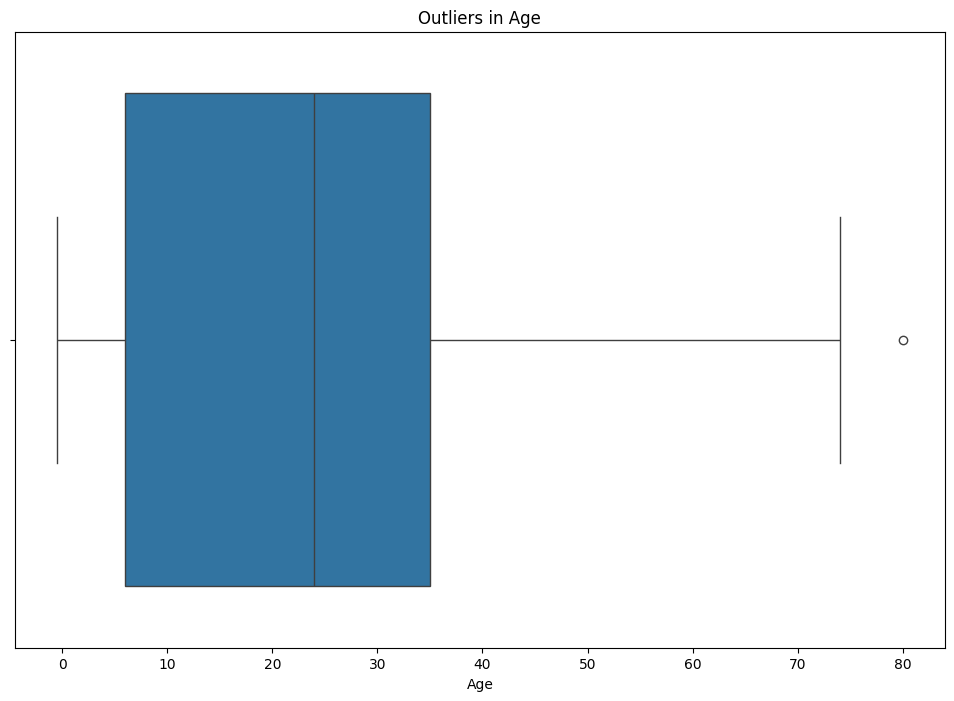

In [112]:
# Let's check outliers in Age
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Age')
plt.title('Outliers in Age')
plt.show()

### 5.4.3 Observations
- `No` outliers in `Age` feature.

## 5.5 `Fare Column`

In [113]:
# Let's check the maximum and minimum Fare
df_train['Fare'].max(), df_train['Fare'].min()

(512.3292, 0.0)

### 5.5.1 Observations
- The `maximum fare` is `512.32`.
- The `minimum fare` is `0`.

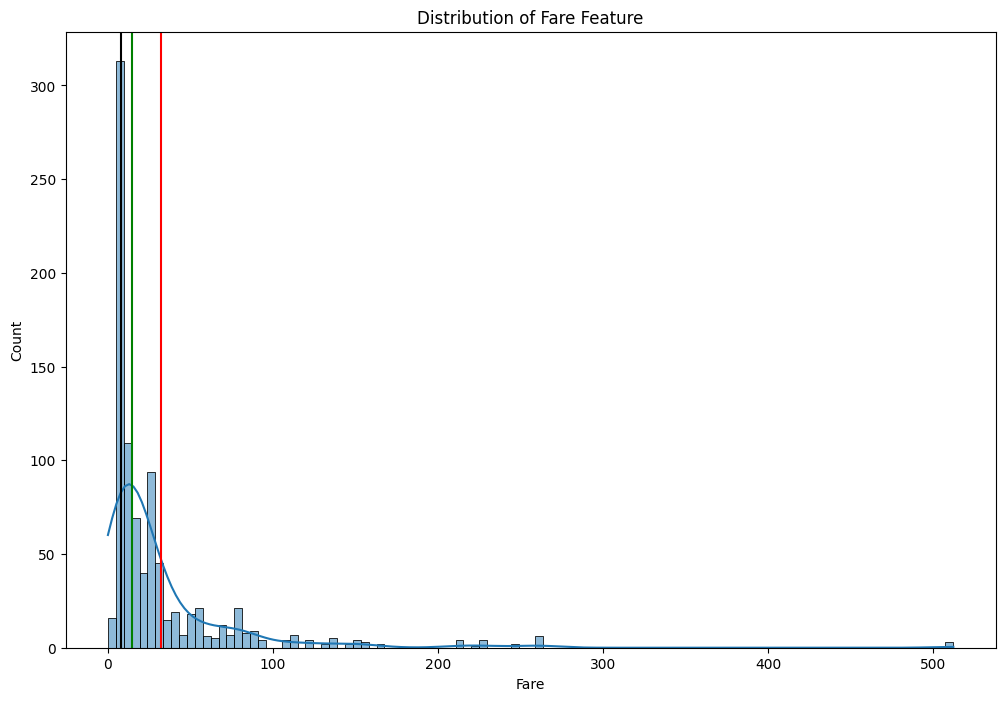

The mean of Fare is: 32.204207968574636
The median of Fare is: 14.4542
The mode of Fare is: 8.05


In [114]:
# Let's check the distribution of fare and plot mean, median and mode
plt.figure(figsize = (12, 8))

sns.histplot(df_train, x = 'Fare', kde = True)
plt.title('Distribution of Fare Feature')
plt.axvline(df_train['Fare'].mean(), color = 'red')
plt.axvline(df_train['Fare'].median(), color = 'green')
plt.axvline(df_train['Fare'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"The mean of Fare is: {df_train['Fare'].mean()}")
print(f"The median of Fare is: {df_train['Fare'].median()}")
print(f"The mode of Fare is: {df_train['Fare'].mode()[0]}")

### 5.5.2 Observation
- `Fare` is `not normaly` distributed.
- `Mean` is `32.20`.
- `Median` is `14.45`.
- `Mode` is `8.05`.

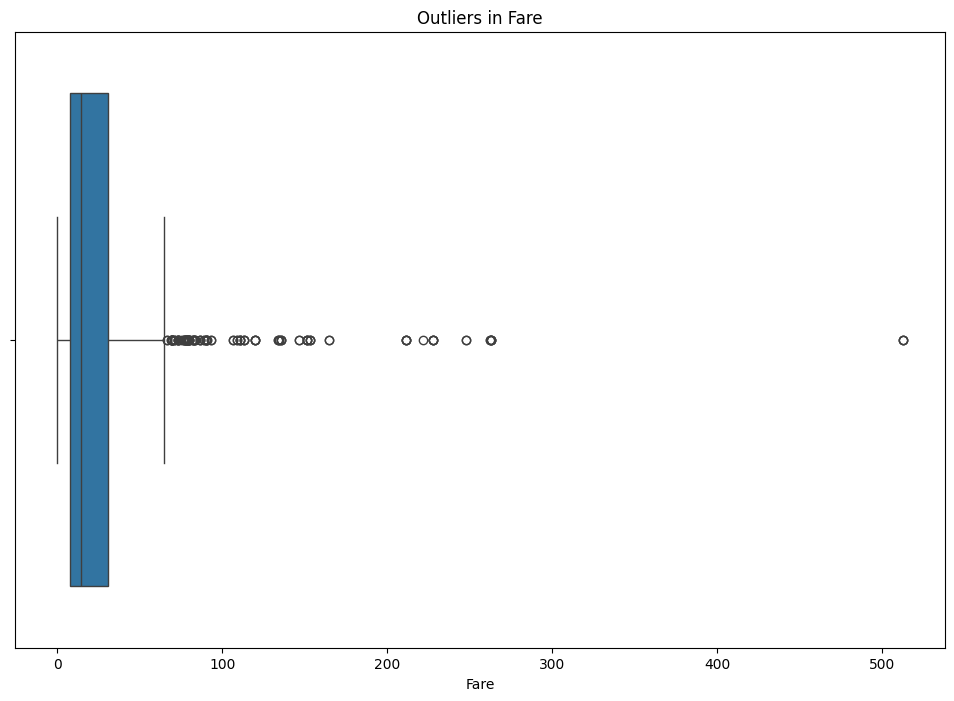

In [115]:
# Let's check outliers in Fare
plt.figure(figsize = (12, 8))

sns.boxplot(df_train, x = 'Fare')
plt.title('Outliers in Fare')
plt.show()

In [116]:
# Let's check those passengers who paid no Fare in titanic
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Adult
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Adult
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Young Adult
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,-0.5,0,0,239853,0.0,NaN,S,Infants
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Student
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,-0.5,0,0,239853,0.0,NaN,S,Infants
466,467,0,2,"Campbell, Mr. William",male,-0.5,0,0,239853,0.0,NaN,S,Infants
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,-0.5,0,0,239854,0.0,NaN,S,Infants
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Adult
633,634,0,1,"Parr, Mr. William Henry Marsh",male,-0.5,0,0,112052,0.0,NaN,S,Infants


### 5.5.3 Observations
- We can see that `15 Passengers` are travelling in titanic `without paying` so these are `outliers` because nobody is allowed to travel without paying.

In [120]:
# Filter out the data where Fare = 0
df_train = df_train[df_train['Fare'] != 0]

In [121]:
# Now, again the for those rows whera Fare is 0
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup


### 5.5.4 Observations
- We `removed` the `outliers` from the `Fare` feature.

In [ ]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
